In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7e33397bd4ccce018495dc8b0d0c5e41


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | klaksvik
Processing Record 2 of Set 1 | megion
Processing Record 3 of Set 1 | sioux lookout
Processing Record 4 of Set 1 | arraial do cabo
Processing Record 5 of Set 1 | beringovskiy
Processing Record 6 of Set 1 | champerico
Processing Record 7 of Set 1 | christchurch
Processing Record 8 of Set 1 | castro
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | stornoway
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | hilo
Processing Record 16 of Set 1 | prince rupert
Processing Record 17 of Set 1 | atuona
Processing Record 18 of Set 1 | erenhot
Processing Record 19 of Set 1 | teguise
Processing Record 20 of Set 1 | kalaleh
Processing Record 21 of Set 1 | minab
Processing Record 22 of Set 1 | palora
Processing Record 23 of Set 1 | sorva

Processing Record 35 of Set 4 | tuktoyaktuk
Processing Record 36 of Set 4 | belmonte
Processing Record 37 of Set 4 | guerrero negro
Processing Record 38 of Set 4 | halalo
City not found. Skipping...
Processing Record 39 of Set 4 | karamea
City not found. Skipping...
Processing Record 40 of Set 4 | buala
Processing Record 41 of Set 4 | scottsburgh
City not found. Skipping...
Processing Record 42 of Set 4 | vila velha
Processing Record 43 of Set 4 | sistranda
Processing Record 44 of Set 4 | tokur
Processing Record 45 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 46 of Set 4 | namanga
Processing Record 47 of Set 4 | takatsuki
Processing Record 48 of Set 4 | fairbanks
Processing Record 49 of Set 4 | kushiro
Processing Record 50 of Set 4 | xining
Processing Record 1 of Set 5 | yaan
Processing Record 2 of Set 5 | komsomolskiy
Processing Record 3 of Set 5 | okoneshnikovo
Processing Record 4 of Set 5 | tulle
Processing Record 5 of Set 5 | madanapalle
Processin

Processing Record 25 of Set 8 | chuy
Processing Record 26 of Set 8 | poronaysk
Processing Record 27 of Set 8 | saint-georges
Processing Record 28 of Set 8 | san carlos
Processing Record 29 of Set 8 | lamu
Processing Record 30 of Set 8 | that phanom
Processing Record 31 of Set 8 | vestmanna
Processing Record 32 of Set 8 | virginia beach
Processing Record 33 of Set 8 | belyy yar
Processing Record 34 of Set 8 | sakakah
Processing Record 35 of Set 8 | lolua
City not found. Skipping...
Processing Record 36 of Set 8 | oistins
Processing Record 37 of Set 8 | jumla
Processing Record 38 of Set 8 | amahai
Processing Record 39 of Set 8 | san jose
Processing Record 40 of Set 8 | dunedin
Processing Record 41 of Set 8 | oriximina
Processing Record 42 of Set 8 | sidi ali
Processing Record 43 of Set 8 | amparai
City not found. Skipping...
Processing Record 44 of Set 8 | sangar
Processing Record 45 of Set 8 | te anau
Processing Record 46 of Set 8 | bilibino
Processing Record 47 of Set 8 | solnechnyy
Pr

Processing Record 14 of Set 12 | tawang
Processing Record 15 of Set 12 | methven
Processing Record 16 of Set 12 | nizhniy baskunchak
Processing Record 17 of Set 12 | vuktyl
Processing Record 18 of Set 12 | mildura
Processing Record 19 of Set 12 | bend
Processing Record 20 of Set 12 | presidencia roque saenz pena
Processing Record 21 of Set 12 | kerema
Processing Record 22 of Set 12 | hunza
City not found. Skipping...
Processing Record 23 of Set 12 | mandera
Processing Record 24 of Set 12 | whithorn
Processing Record 25 of Set 12 | samusu
City not found. Skipping...
Processing Record 26 of Set 12 | havre-saint-pierre
Processing Record 27 of Set 12 | avera
Processing Record 28 of Set 12 | glazunovka
Processing Record 29 of Set 12 | khudumelapye
Processing Record 30 of Set 12 | dharmavaram
Processing Record 31 of Set 12 | garoua
Processing Record 32 of Set 12 | mopti
Processing Record 33 of Set 12 | port jervis
Processing Record 34 of Set 12 | kumano
Processing Record 35 of Set 12 | ahipa

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Klaksvik,62.23,-6.59,48.20,76,97,9.17,FO,2020-08-25 18:20:14
1,Megion,61.03,76.11,51.80,93,34,4.47,RU,2020-08-25 18:20:14
2,Sioux Lookout,50.10,-91.92,66.20,72,90,8.05,CA,2020-08-25 18:15:48
3,Arraial Do Cabo,-22.97,-42.03,71.60,53,75,14.99,BR,2020-08-25 18:20:15
4,Beringovskiy,63.05,179.32,48.51,81,91,10.20,RU,2020-08-25 18:20:15
5,Champerico,14.30,-91.92,87.80,74,40,9.17,GT,2020-08-25 18:20:15
6,Christchurch,-43.53,172.63,39.20,64,5,9.17,NZ,2020-08-25 18:20:15
7,Castro,-24.79,-50.01,63.90,64,8,9.42,BR,2020-08-25 18:15:25
8,Punta Arenas,-53.15,-70.92,41.00,60,85,16.11,CL,2020-08-25 18:20:08
9,Jamestown,42.10,-79.24,77.00,78,75,16.11,US,2020-08-25 18:20:15


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Klaksvik,FO,2020-08-25 18:20:14,62.23,-6.59,48.20,76,97,9.17
1,Megion,RU,2020-08-25 18:20:14,61.03,76.11,51.80,93,34,4.47
2,Sioux Lookout,CA,2020-08-25 18:15:48,50.10,-91.92,66.20,72,90,8.05
3,Arraial Do Cabo,BR,2020-08-25 18:20:15,-22.97,-42.03,71.60,53,75,14.99
4,Beringovskiy,RU,2020-08-25 18:20:15,63.05,179.32,48.51,81,91,10.20
...,...,...,...,...,...,...,...,...,...
555,Bubaque,GW,2020-08-25 18:21:11,11.28,-15.83,81.70,76,82,11.72
556,Darab,IR,2020-08-25 18:21:11,28.75,54.54,81.19,14,0,5.79
557,Bakal,RU,2020-08-25 18:21:12,54.94,58.81,56.43,96,75,8.68
558,Isla Mujeres,MX,2020-08-25 18:21:12,21.23,-86.73,81.00,94,90,4.70


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

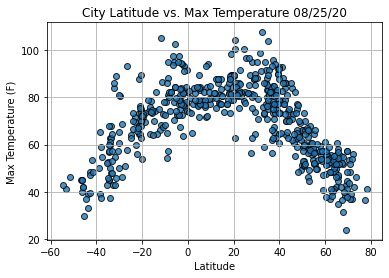

In [15]:
# Import the time module.
import time
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

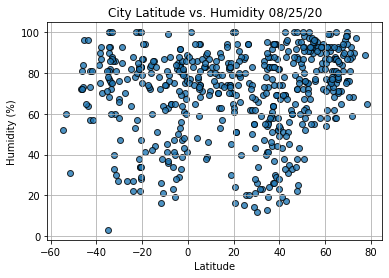

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

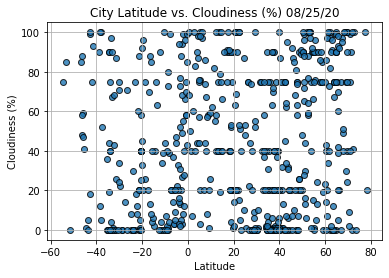

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

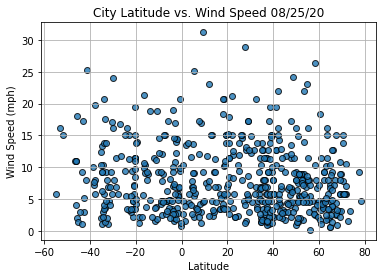

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()